# Precision

The data served by the PSM3 API has limited numerical precision, and that precision varies by variable.  Many variables, including the various irradiance quantities, are limited to integer precision.  Some variables have one, two, or four digits after the decimal point.

Note that some variables are categorical (e.g. `fill_flag` and `cloud_type`); we exclude those and consider only true numerical variables in this notebook. 

In [1]:
import pvlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def make_precision_plot(df):
    df = df.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])
    precisions = {}

    for column in df:
        step = min(np.diff(sorted(np.unique(df[column]))))
        precisions[column] = step

    pd.Series(precisions).sort_values().plot.bar(logy=True)
    plt.ylabel('Precision')

## PSM3 TMY

In [3]:
attributes = [
    'dhi',
    'dni',
    'ghi',
    'dew_point',
    'air_temperature',
    'surface_pressure',
    'wind_direction',
    'wind_speed',
    'surface_albedo'
]
df, meta = pvlib.iotools.get_psm3(40, -80, 'DEMO_KEY', 'assessingsolar@gmail.com',
                                  names='tmy', attributes=attributes,
                                  map_variables=False, leap_day=True)

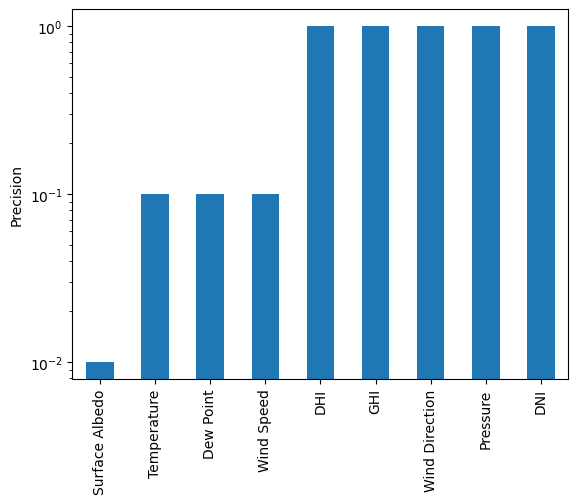

In [4]:
make_precision_plot(df)

## PSM3 Hourly

In [5]:
attributes = [
    'air_temperature',
    'clearsky_dhi',
    'clearsky_dni',
    'clearsky_ghi',
    'dew_point',
    'dhi',
    'dni',
    'ghi',
    'ghuv-280-400',
    'ghuv-295-385',
    'relative_humidity',
    'solar_zenith_angle',
    'surface_albedo',
    'surface_pressure',
    'total_precipitable_water',
    'wind_direction',
    'wind_speed'
]
df, meta = pvlib.iotools.get_psm3(40, -80, 'DEMO_KEY', 'assessingsolar@gmail.com',
                                  names=2020, interval=60, attributes=attributes,
                                  map_variables=False, leap_day=True)

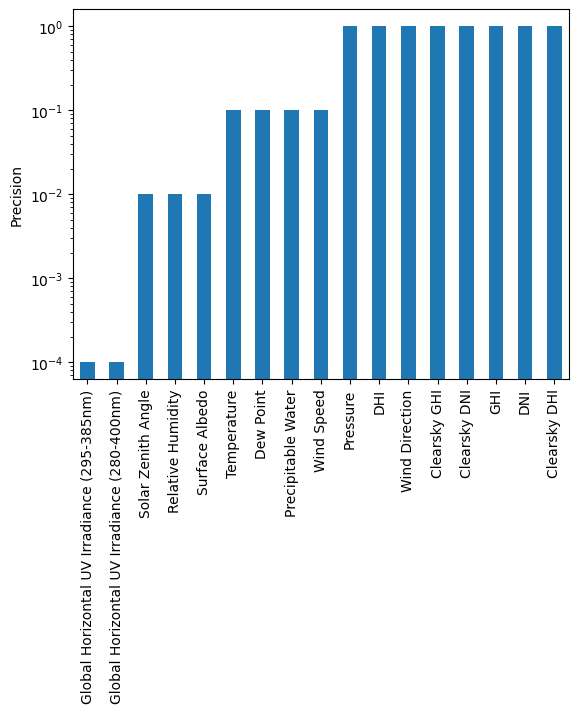

In [6]:
make_precision_plot(df)

## PSM3 5-minute

In [7]:
attributes = [
    'ghi',
    'dhi',
    'dni',
    'clearsky_dhi',
    'clearsky_dni',
    'clearsky_ghi',
    'air_temperature',
    'wind_speed',
    'wind_direction',
    'surface_pressure',
    'dew_point',
    'relative_humidity',
    'total_precipitable_water',
    'solar_zenith_angle',
    'surface_albedo',
]
df, meta = pvlib.iotools.get_psm3(40, -80, 'DEMO_KEY', 'assessingsolar@gmail.com',
                                  names=2018, interval=5, attributes=attributes,
                                  map_variables=False, leap_day=True)

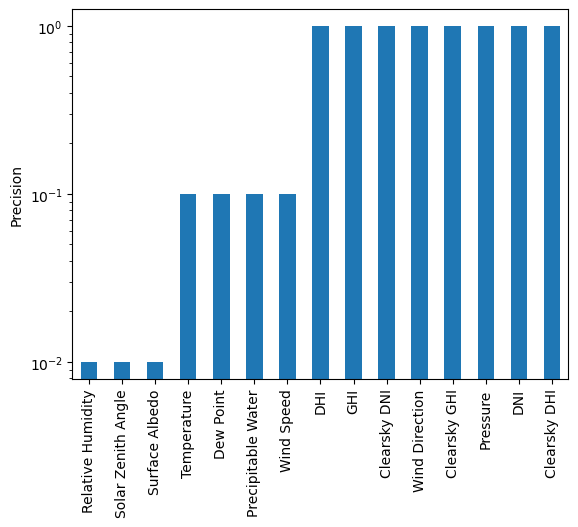

In [8]:
make_precision_plot(df)

In [9]:
%load_ext watermark
%watermark --iversions -u -d -t

Last updated: 2023-01-24 20:49:55

matplotlib: 3.5.2
numpy     : 1.22.3
pvlib     : 0.9.3
pandas    : 1.5.0

